<a href="https://colab.research.google.com/github/akashjborah97/Crypto-NER/blob/main/CryptoNER_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Importing Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords

#2. Importing Data

In [3]:
crypto_tweets=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Deep Learning/Crypto NER/data.csv')
crypto_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44136 entries, 0 to 44135
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       44136 non-null  int64 
 1   content  43486 non-null  object
dtypes: int64(1), object(1)
memory usage: 689.8+ KB


In [4]:
crypto_tweets.head()

,id,content
0,321712,Hey 👋 \n\nWe re using our bot:\n\nhttps://t.me...
1,321713,Good stuff \n\nI am surprised I took so long t...
2,321717,you are using a non-official one
3,321718,use the one that uniswap uses: https://thegrap...
4,321719,keep in mind this is a hot subgraph so it can ...


In [5]:
crypto_tweets.dropna(axis=0,inplace=True)  #dropping na
crypto_tweets.drop_duplicates(subset=['content'],inplace=True)
crypto_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42659 entries, 0 to 44135
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       42659 non-null  int64 
 1   content  42659 non-null  object
dtypes: int64(1), object(1)
memory usage: 999.8+ KB


#3. Functions

##a. Lower Case

In [6]:
def lower_case(x):
    x = x.lower()
    return x

def lower_tweets(data):
  for i in range(len(data)):
    data[i]=lower_case(data[i])
  return data

##b. Removing Unicode Characters

In [7]:
import re
def remove_unicode_haracters(text):
  text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text)
  return text


def rmv_unic(data):
  for i in range(len(data)):
    data[i]=remove_unicode_haracters(data[i])
  return data

##c. Removing Stopwords

In [8]:
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
def remove_stopwords(text):
  stop = stopwords.words('english')
  text = " ".join([word for word in text.split() if word not in (stop)])
  return text

def rmv_stopwords(data):
  for i in range(len(data)):
    data[i]=remove_stopwords(data[i])
  return data

#4. Vocabulary Building
##Generating a corpus of Crypto related terms

In [10]:
term_abb=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Deep Learning/Crypto NER/term_abb.csv')
term_abb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   terms          78 non-null     object
 1   abbreviations  78 non-null     object
dtypes: object(2)
memory usage: 1.3+ KB


In [11]:
term_abb.head()

,terms,abbreviations
0,Auroracoin,AUR
1,BitConnect (inactive),BCC
2,Bitcoin Cash,BCH
3,Bitcoin,BTCorXBT
4,Dash,DASH


In [12]:
term_def=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Deep Learning/Crypto NER/term_def.csv')
term_def.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   terms        160 non-null    object
 1   definition1  160 non-null    object
 2   definition2  14 non-null     object
dtypes: object(3)
memory usage: 3.9+ KB


In [13]:
term_def.head()

,terms,definition1,definition2
0,51% attack,A hypothetical situation where more than half ...,NaN
1,51% attack protection,A protection mechanism implemented by several ...,NaN
2,AFK,Away From Keyboard; used on social media platf...,NaN
3,Airdrop,An event where a blockchain project distribute...,NaN
4,Altcoin,Any cryptocurrency that is an alternative to B...,NaN


In [14]:
term1=term_abb["terms"].tolist()
term2=term_def["terms"].tolist()
term3=term_abb["abbreviations"].tolist()
term1[1], term2[1], term3[1]

('BitConnect (inactive)', '51% attack protection', 'BCC')

In [15]:
terms=term1+term2+term3
terms[23],terms[79],terms[250]

('NEM', '51% attack protection', 'MZC')

In [16]:
#new_terms is the vocabulary of crypto related words
new_terms=lower_tweets(terms)
new_terms[23]

'nem'

In [17]:
new_terms[3:7]

['bitcoin', 'dash', 'dogecoin', 'eos.io']

#5. Cleaning data(crypto tweets)

In [18]:
def get_data(data):
  data = data["content"].tolist()
  return data  

In [19]:
data1=get_data(crypto_tweets)
data1[0]

'Hey 👋 \n\nWe re using our bot:\n\nhttps://t.me/lobster_watcher\n\nAnd also filtering such recommendations to select only topics worth attention.\n\n~5 people are in duty every day.'

##a. Lower Case

In [20]:
lower_data=lower_tweets(data1)
lower_data[0]

'hey 👋 \n\nwe re using our bot:\n\nhttps://t.me/lobster_watcher\n\nand also filtering such recommendations to select only topics worth attention.\n\n~5 people are in duty every day.'

##b. Removing Unicode Characters

In [21]:
rmv_unic_data=rmv_unic(lower_data)
rmv_unic_data[0]

'hey  we re using our botand also filtering such recommendations to select only topics worth attention5 people are in duty every day'

##c. Removing Stopwords

In [22]:
new_data = rmv_stopwords(rmv_unic_data)
new_data[0]

'hey using botand also filtering recommendations select topics worth attention5 people duty every day'

##d. Removing Contracting

In [23]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

In [24]:
def text_cleaner(text):
    newString = text.lower()
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString) 
    newString = re.sub('[m]{2,}', 'mm', newString)
    tokens=newString.split()
    long_words=[]
    for i in tokens:
        if len(i)>1:                                                 #removing short word
            long_words.append(i)   
    return (" ".join(long_words)).strip()

In [25]:
#call the function
cleaned_text = []
for t in new_data:
    cleaned_text.append(text_cleaner(t)) 

In [26]:
cleaned_text[0]

'hey using botand also filtering recommendations select topics worth attention people duty every day'

##e. Understanding the distribution of the sequences

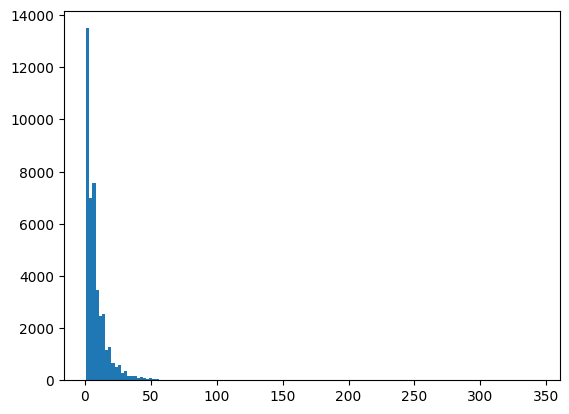

In [27]:
lenghts=[len(t.split(' '))for t in cleaned_text]
plt.hist(lenghts,bins=len(set(lenghts)))
plt.show()

In [28]:
def empty_list_remove(input_list):
    new_list = []
    for ele in input_list:
            new_list.append(ele)
    return new_list

In [29]:
cleaned_texts=empty_list_remove(cleaned_text)

In [30]:
cleaned_texts[1], len(cleaned_texts)

('good stuff surprised took long find community lol', 42659)

In [31]:
df = pd.DataFrame(cleaned_text,columns =['cleaned_text'])
df.drop_duplicates(subset=['cleaned_text'],inplace=True)
df.dropna(axis=0,inplace=True)#dropping na
df.head(15)

,cleaned_text
0,hey using botand also filtering recommendation...
1,good stuff surprised took long find community lol
2,using nonofficial one
3,use one uniswap uses
4,keep mind hot subgraph change anytime without ...
5,
6,voting money beyond dumb fact someone money do...
8,adjusting gov model
9,voting often delegating people know shit
10,quadratic voting solves needs somehow verify i...


#6. Feature Extraction (Extracting noun phrases)
###Using NLP techniques to extract relevant features such as nouns and noun phrases from the messages in the dataset. Some popular feature extraction techniques include tokenization, part-of-speech tagging, and named entity recognition.

In [32]:
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk import RegexpParser
from nltk import Tree
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [33]:
def get_noun_phrases(text):
    pos = pos_tag(word_tokenize(text))
    count = 0
    half_chunk = ""
    for word, tag in pos:
        if re.match(r"NN.*", tag):
            count+=1
            if count>=1:
                half_chunk = half_chunk + word + " "
        else:
            half_chunk = half_chunk+"---"
            count = 0
    half_chunk = re.sub(r"-+","?",half_chunk).split("?")
    half_chunk = [x.strip() for x in half_chunk if x!=""]
    return half_chunk

In [34]:
get_noun_phrases(cleaned_text[4]) #trying for one tweet

['mind', 'subgraph change', 'notice']

In [35]:
final_tweeets = list(filter(None, cleaned_text))   #dropping empty values from the list of tweets

In [36]:
final_tweeets[:7], len(final_tweeets)

(['hey using botand also filtering recommendations select topics worth attention people duty every day',
  'good stuff surprised took long find community lol',
  'using nonofficial one',
  'use one uniswap uses',
  'keep mind hot subgraph change anytime without notice',
  'voting money beyond dumb fact someone money doesnt mean better judgement contrary point probably checked busy chilling',
  'adjusting gov model'],
 39463)

In [37]:
def nouns(data):
  for i in range(len(data)):
    data[i]=get_noun_phrases(data[i])
  return data

In [38]:
nouns=nouns(final_tweeets)

In [39]:
nouns[4],nouns[22244],type(nouns)

(['mind', 'subgraph change', 'notice'],
 ['thats part way history repeats',
  'memory',
  'fact',
  'oil',
  'part lexicon',
  'time',
  'revolution indicate theres nothing',
  'pattern'],
 list)

In [40]:
def empty_list_remove(input_list):
    new_list = []
    for ele in input_list:
        if ele:
            new_list.append(ele)
    return new_list

In [41]:
#new_nouns contain all the nouns & noun phrases from the dataset as list
new_nouns=empty_list_remove(nouns)        

In [42]:
new_nouns[6544]

['trade commodities']

In [43]:
len(new_nouns)

38108

#7. Classification: 
###Classify the extracted features as either crypto-related or not. This can be done by comparing the features with the base vocabulary. Techniques such as lexical comparison, semantic comparison, and acoustic comparison can be used to classify the features.
Checking similarity of nouns in the sentences with corpus of crypto related terms using Sentence transformers(semantic comparison)

In [44]:
pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 71.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 66.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 57.4 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125942 sha256=6d8d6afe0471727cdb0fb6e94467d74ed143e9efbdcfa3fa64fed6f2ae468106
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [45]:
!apt-get install -y -qq locales
!locale-gen en_US.UTF-8
!update-locale LC_ALL=en_US.UTF-8 LANG=en_US.UTF-8

Generating locales (this might take a while)...
  en_US.UTF-8... done
Generation complete.


In [46]:
!python -m spacy download en_core_web_md

2023-05-01 11:08:56.942495: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 5.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [47]:
!pip show spacy

Name: spacy
Version: 3.5.2
Summary: Industrial-strength Natural Language Processing (NLP) in Python
Home-page: https://spacy.io
Author: Explosion
Author-email: contact@explosion.ai
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: catalogue, cymem, jinja2, langcodes, murmurhash, numpy, packaging, pathy, preshed, pydantic, requests, setuptools, smart-open, spacy-legacy, spacy-loggers, srsly, thinc, tqdm, typer, wasabi
Required-by: en-core-web-md, en-core-web-sm, fastai


In [48]:
import spacy
# Load the en_core_web_md model for lexical comparison
nlp = spacy.load('en_core_web_md')

###Install dependencies to check simialrity
1.Initialise the model

In [63]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

In [75]:
# Load the pre-trained SBERT model for semantic comparison
mbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

2. Encode the noun and noun phrases of sentences:

In [76]:
def sem(x):
  matrix=[]
  for i in range(len(x)):
    en=mbert_model.encode(x[i])
    # print(en)
    matrix.append(en)
  return matrix

In [77]:
sentence_embeddings_matrix=sem(new_nouns) 

In [78]:
print(sentence_embeddings_matrix[0])

[[ 0.3460113  -0.05862964  2.3071382  ...  0.23011811  0.06801065
   0.28735468]
 [ 0.24728113 -0.47802398  2.115099   ... -0.02662093 -0.00948067
   0.35242143]
 [-0.3199897  -0.126539    2.559552   ... -0.4089769  -0.7333975
   0.16143174]
 [ 0.00286184 -0.77023584  1.986948   ...  0.02800251 -0.21661688
   0.02996399]
 [ 0.6752291  -0.69553167  2.1722455  ...  0.20119695 -0.8357315
  -0.20945556]
 [ 0.00727413 -0.40555203  2.3804216  ... -0.2969303   0.6441443
  -0.44650093]]


In [79]:
type(sentence_embeddings_matrix), len(sentence_embeddings_matrix)

(list, 38108)

3. Encode the crypto terms:

In [80]:
crypto_terms=new_terms

In [81]:
terms_embeddings = mbert_model.encode(crypto_terms)

In [ ]:
print(terms_embeddings[0])

In [83]:
terms_embeddings.shape, type(terms_embeddings)

((316, 768), numpy.ndarray)

4. Checking similarity

Function to find cosine similarity between nouns in the sentences and corpus of crypto related terms

In [86]:
from sklearn.metrics.pairwise import cosine_distances

In [87]:
def cosine_dist(x,y):
  dist_matrix=[]
  for i in range(len(x)):
    cd = cosine_distances(x[i],y[0:])
    dist_matrix.append(cd)  
  return dist_matrix


In [88]:
x=cosine_dist(sentence_embeddings_matrix,terms_embeddings)

Pooling max for similarity values for each noun in a message

In [89]:
def myMax(list1):

    max = list1[0]
    for x in list1:
        if x > max:
            max = x
    return max

In [90]:
def similarity(x):
  r=[]
  for all in x:
    for i in all:
      #print(i)
      r.append(myMax(i))
      break
  return r

In [91]:
#similarity values of nouns in sentences with the corpus of word
similarity_values=similarity(x)      

In [92]:
max(similarity_values), min(similarity_values)          #maximum similarity and minimum similarity

(1.055799, 0.66844577)

Classifying as crypto related or not

In [93]:
threshold=1.0

In [100]:
def crypto_related(x):
  new_lst=[]
  for i in range(len(x)):
    if x[i]> threshold:
      new_lst.append("1")
    else:
      new_lst.append("0")
  return new_lst

In [101]:
Crypto_related=crypto_related(similarity_values)

###Final dataframe with Nouns in message,Similarity score and	Crypto_related or not

In [106]:
final_df=pd.DataFrame(zip(new_nouns), columns=['Nouns_in_message'])     #primary dataframe

In [107]:
final_df['Similarity']=similarity_values
final_df['Crypto_related']=Crypto_related

In [108]:
final_df.head(10)

,Nouns_in_message,Similarity,Crypto_related
0,"[hey, botand, recommendations, topics, attenti...",0.892123,0
1,"[stuff, find community lol]",0.880819,0
2,[uniswap],0.775288,0
3,"[mind, subgraph change, notice]",0.931696,0
4,"[money, fact someone money doesnt, judgement, ...",0.808403,0
5,[gov model],0.775231,0
6,[people],0.934089,0
7,"[voting solves, verify identity holder]",0.836770,0
8,[hope],0.908201,0
9,[guys],0.843970,0


In [109]:
final_df.Crypto_related.unique()

array(['0', '1'], dtype=object)

# 8. Evaluation

In [110]:
features = final_df['Nouns_in_message']
labels = final_df['Crypto_related']

Label Encoding

In [114]:
from sklearn.preprocessing import LabelEncoder

In [117]:
# Create a label encoder object
le = LabelEncoder()

In [120]:
# Flatten the list of lists into a 1D array and fit the encoder to obtain unique labels
unique_labels = np.unique(np.concatenate(features))
unique_labels

array(['aaa', 'aaa style aaa', 'aaaaa im debooooonkingggg', ...,
       'zulip hehuhuhehee', 'zygis', 'zz'], dtype='<U306')

In [121]:
le.fit(unique_labels)

LabelEncoder()

In [ ]:
# Encode each feature in the data using the fitted encoder
encoded_data = [[le.transform([f])[0] for f in sample] for sample in features]
# Convert the encoded data to a numpy array to obtain the feature matrix
feature_matrix = np.array(encoded_data)

In [ ]:
feature_matrix[0:2]

In [111]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature_matrix, labels, test_size=0.2, random_state=42)


a. PCA for dimentionality reduction of sentence_embedding_matrix

b. Train the classifier

In [112]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)


ValueError: ignored

c. Predict on testing set and evaluate the performance using metrics such as precision, recall, and F1 score

In [ ]:
from sklearn.metrics import classification_report

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
